In [1]:
import numpy as np
import pandas as pd
import cPickle
import multiprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

### Reading tweets

In [2]:
kinopoisk_train = pd.read_csv('../data/kinopoisk_train.csv', encoding='utf-8')

In [3]:
kinopoisk_train.head()

,text,label
0,"\n Прежде чем вообще что-то говорить, нуж...",1
1,"\nНа мой взгляд, любой боевик должен быть стил...",1
2,\nОб этом фильме мне довелось слышать не один ...,1
3,"\nОчень сложно вспомнить фильм, в котором не б...",0
4,\nВ фильме показан нетрадиционный Шерлок Холмс...,1


In [4]:
texts, labels = kinopoisk_train.text.values, kinopoisk_train.label.values

### Reading vocabulary and embeddings

In [5]:
word2id, embeddings = cPickle.load(open('../data/w2v/vectors_l.pkl', 'rb'))
# word2id, embeddings = cPickle.load(open('../data/w2v/parkin_vectors.pkl', 'rb'))

In [6]:
vocabulary = word2id.keys()
eos_id = word2id[u'</s>']

### Lemmatizing and replacing words with ids

In [7]:
from nltk.tokenize import RegexpTokenizer
import pymorphy2

tokenizer = RegexpTokenizer(u'[а-яА-Яa-zA-Z]+')
morph = pymorphy2.MorphAnalyzer()

def text2seq(text):
    tokens_norm = [morph.parse(w)[0].normal_form for w in tokenizer.tokenize(text)]
    return [word2id[w] for w in tokens_norm if w in vocabulary] + [eos_id]

sample = texts[49]

print sample
print u' '.join(tokenizer.tokenize(sample))
print u' '.join([morph.parse(w)[0].normal_form for w in tokenizer.tokenize(sample)])
print text2seq(sample)


Мне странно, что отзывы о таком шедевре настолько холодные… Такое впечатление что тут открыли форум критиков «ВК»… 

Фильм поражает своей масштабностью, красотой и глубиной образов и самого мира — до сих пор удивляюсь, как мог один человек создать целый мир, целую эпоху со своими мифами, героями, географией, летоисчеслением, прошлым, настояшим и будующим! 

Гений Толкиена идеально перенесен на большие экраны и экранизация романа просто разрывает тебя на куски! Когда смотришь фильм — ты попадаешь в сказку… причем не добрую и поучительную, а реалистичную и жесткую, где высоко приподнесены такие извечные ценности как честь, достоинство, отвага, долг. 

А музыка фильма это отдельный разговор! Музыкальная тема фильма выше всяких похвал — ну как могут не тронуть сердце эльфийские баллады или героические мотивы на фоне батальных сцен!

Бесспорно каждый Оскар из 11 полученных взят заслужено!

10 из 10
Мне странно что отзывы о таком шедевре настолько холодные Такое впечатление что тут открыли 

Dumping

Loading

In [8]:
X = cPickle.load(open('../data/X_kinopoisk_train.pkl', 'rb'))

Distribution of sequences' lengths 

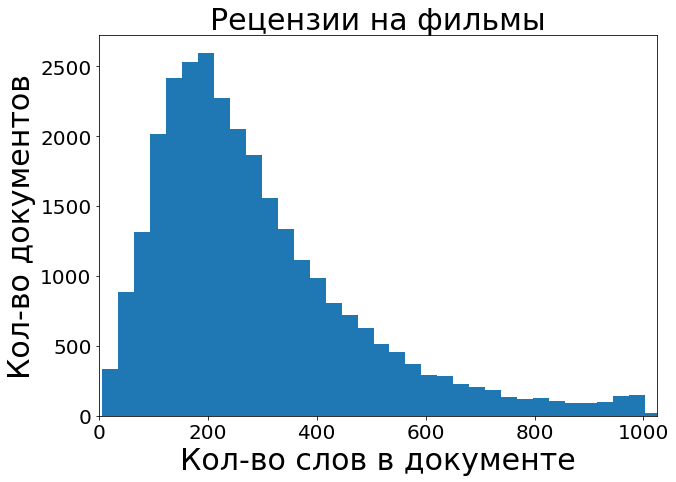

In [20]:
length_max = max(map(len, X))
plt.figure(figsize=(10,7))
plt.hist(map(len, X), bins=80)
plt.title(u"Рецензии на фильмы", fontsize=30)
plt.xlim(0, 1024)
plt.xlabel(u"Кол-во слов в документе", fontsize=30)
plt.ylabel(u"Кол-во документов", fontsize=30)
plt.tick_params(labelsize=20)
plt.show()

In [13]:
sum(map(len, X)) / len(X)

291

Drop samples with the length >= 1024

In [31]:
length_max = 1024
y = kinopoisk_train.label.values
y = y[np.array(map(len, X)) < length_max]
X = [x for x in X if len(x) < length_max]

### Zero padding

In [32]:
X = [x + [eos_id]*(length_max - len(x)) for x in X]

### Examples

In [34]:
print X[0]

[799, 64, 102, 4, 12, 73, 137, 2096, 281, 67, 736, 2359, 4, 7, 663, 31, 57, 94, 139, 11, 51, 8137, 281, 506, 10224, 1, 9144, 8137, 16, 6134, 605, 113, 3, 2, 1330, 506, 14, 1236, 4, 80, 12, 1, 198, 36, 48, 31095, 1, 8400, 6981, 6, 47766, 4082, 2, 1714, 12, 103, 20511, 3, 9, 2205, 15693, 15, 3, 478, 644, 64, 8400, 17, 131, 46, 47766, 11199, 140, 2205, 8687, 3, 565, 71, 39, 31, 178, 506, 6, 26, 50, 8687, 78, 73, 36, 16, 1600, 9748, 5, 2375, 1, 60, 2, 39, 485, 135, 1416, 1403, 6888, 9294, 5, 4, 9294, 5, 30, 38, 4740, 335, 33, 67, 17, 57, 1, 49, 9294, 4, 38, 561, 9294, 5, 9294, 7, 48, 3, 2, 50, 1330, 45, 1, 14, 65, 61240, 1525, 2, 30, 5352, 50, 244, 69, 65, 335, 26177, 15630, 24, 4619, 263, 17, 88, 192, 76, 170, 191, 9, 256, 4, 12, 6401, 8, 69, 368, 9, 732, 29, 1394, 43, 3743, 2, 8882, 427, 109, 2345, 5, 39, 89, 40, 123, 4, 10, 3, 256, 107, 5068, 182, 1, 910, 6, 4211, 78, 1, 281, 1223, 36, 76, 344, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Split into train and validation sets

In [35]:
X = np.array(X)

In [36]:
def cls2probs(cls):
    if cls == -1:
        return [1.,0.,0.]
    elif cls == 0:
        return [0.,1.,0.]
    else:
        return [0.,0.,1.]
y = np.array([cls2probs(cls) for cls in y])

In [37]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.1

X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

In [49]:
print "Train class frequencies:\t", [col.nonzero()[0].shape[0] for col in y_tr.transpose()]
print "Validation class frequencies:\t", [col.nonzero()[0].shape[0] for col in y_val.transpose()]
print "Constant classifier's validation accuracy:\t", [col.nonzero()[0].shape[0] for col in y_val.transpose()][2] * 1. / y_val.shape[0]

Train class frequencies:	[3426, 3250, 19460]
Validation class frequencies:	[326, 374, 2205]
Constant classifier's validation accuracy:	0.759036144578


### Resampling

# Network learning

In [39]:
import tensorflow as tf
from tensorflow.contrib.rnn import GRUCell
from tensorflow.python.ops.rnn import bidirectional_dynamic_rnn as bi_rnn
from tensorflow.contrib.layers import fully_connected

from utils import *

In [50]:
from sklearn.metrics import f1_score
f_macro = lambda y1, y2: f1_score(y1, y2, average="macro")
f_micro = lambda y1, y2: f1_score(y1, y2, average="micro")

y_pred_major = np.zeros(y_val.shape)
y_pred_major[:,2] = 1.
print "Constant classifier's macro-averaged F-score on validation set:", f_macro(y_val, y_pred_major)
print "Constant classifier's micro-averaged F-score on validation set:", f_micro(y_val, y_pred_major)

Constant classifier's macro-averaged F-score on validation set: 0.287671232877
Constant classifier's micro-averaged F-score on validation set: 0.759036144578


### Bi-RNN

In [52]:
EMBED_DIM = 300
HIDDEN_SIZE = 100
NUM_CLASSES = 3

tf.reset_default_graph()

batch_ph   = tf.placeholder(tf.int32, [None, None])
target_ph  = tf.placeholder(tf.float32, [None, NUM_CLASSES])
seq_len_ph = tf.placeholder(tf.int32, [None])
keep_prob_ph = tf.placeholder(tf.float32)

embeddings_ph = tf.placeholder(tf.float32, [len(vocabulary), EMBED_DIM])
embeddings_var = tf.Variable(tf.constant(0., shape=[len(vocabulary), EMBED_DIM]), trainable=False)
init_embeddings = embeddings_var.assign(embeddings_ph)
batch_embedded = tf.nn.embedding_lookup(embeddings_var, batch_ph)
    
# Bi-RNN layers
outputs,_ = bi_rnn(GRUCell(HIDDEN_SIZE), GRUCell(HIDDEN_SIZE),
                   inputs=batch_embedded,sequence_length=seq_len_ph, dtype=tf.float32, scope="bi_rnn1")  
outputs = tf.concat(outputs, 2)
# outputs,_ = bi_rnn(GRUCell(HIDDEN_SIZE), GRUCell(HIDDEN_SIZE),
#                          inputs=outputs,sequence_length=seq_len_ph, dtype=tf.float32, scope="bi_rnn2")
# outputs = tf.concat(outputs, 2)

# Last output of Bi-RNN
output = outputs[:,0,:]

# Dropout
drop = tf.nn.dropout(output, keep_prob_ph)

# Fully connected layer
W = tf.Variable(tf.truncated_normal([HIDDEN_SIZE * 2, NUM_CLASSES], stddev=0.1), name="W")
b = tf.Variable(tf.constant(0., shape=[NUM_CLASSES]), name="b")
y_hat = tf.nn.xw_plus_b(drop, W, b, name="scores")

In [53]:
# Adam parameters
LEARNING_RATE = 0.008
EPSILON = 1e-5
BETA1 = 0.9
BETA2 = 0.9
# L2 regularization coefficient
BETA = 0

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_hat, labels=target_ph),
                               name="cross_entropy")
l2_loss = tf.nn.l2_loss(W, name="l2_loss")
loss = cross_entropy + l2_loss * BETA
optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE, beta1=BETA1, beta2=BETA2,
                                   epsilon=EPSILON).minimize(loss)
# optimizer = tf.train.MomentumOptimizer(learning_rate=1e-1, momentum=0.1).minimize(loss)
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(target_ph, 1), tf.argmax(y_hat, 1)), tf.float32))

In [54]:
%%time

DROPOUT = 0.5  # Probability of keeping a neuron
BATCH_SIZE = 256
EPOCHS = 10

train_batch_generator = batch_generator(X_tr, y_tr, BATCH_SIZE)

loss_tr_l = []
loss_val_l = []
ce_tr_l = []  # Cross-entropy
ce_val_l = []
acc_tr_l = []  # Accuracy
acc_val_l = []
f_macro_tr_l = []
f_macro_val_l = []
f_fair_tr_l = []
f_fair_val_l = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(init_embeddings, feed_dict={embeddings_ph: embeddings})
    print "Start learning..."
    for epoch in range(EPOCHS):
        for i in range(int(X_tr.shape[0] / BATCH_SIZE)):
            x_batch, y_batch = train_batch_generator.next()
            seq_len_tr = np.array([list(x).index(eos_id) + 1 for x in x_batch])
            sess.run(optimizer, feed_dict={batch_ph: x_batch, target_ph: y_batch,
                                           seq_len_ph: seq_len_tr, keep_prob_ph: DROPOUT})

        y_pred_tr, ce_tr, loss_tr, acc_tr = sess.run([y_hat, cross_entropy, loss, accuracy],
                                              feed_dict={batch_ph: x_batch, target_ph: y_batch, 
                                                         seq_len_ph: seq_len_tr, keep_prob_ph: 1.0})

        y_pred_val, ce_val, loss_val, acc_val = [], 0, 0, 0
        num_val_batches = X_val.shape[0] / BATCH_SIZE
        for i in range(num_val_batches):
            x_batch_val, y_batch_val = X_val[i * BATCH_SIZE : (i + 1) * BATCH_SIZE],\
                                       y_val[i * BATCH_SIZE : (i + 1) * BATCH_SIZE]
            seq_len_val = np.array([list(x).index(eos_id) + 1 for x in x_batch_val])
            y_pred_val_, ce_val_, loss_val_, acc_val_ = sess.run([y_hat, cross_entropy, loss, accuracy],
                                                         feed_dict={batch_ph: x_batch_val, target_ph: y_batch_val,
                                                                    seq_len_ph: seq_len_val, keep_prob_ph: 1.0})
            y_pred_val += list(y_pred_val_)
            ce_val += ce_val_
            loss_val += loss_val_
            acc_val += acc_val_

        y_pred_val = np.array(y_pred_val)
        ce_val /= num_val_batches
        loss_val /= num_val_batches
        acc_val /= num_val_batches

        y_pred_tr = np.array([cls2probs(cls) for cls in np.argmax(y_pred_tr, 1) - 1])
        y_pred_val = np.array([cls2probs(cls) for cls in np.argmax(y_pred_val, 1) - 1])
        f_macro_tr, f_micro_tr = f_macro(y_batch, y_pred_tr), f_micro(y_batch, y_pred_tr)
        f_macro_val, f_micro_val = f_macro(y_val[:num_val_batches * BATCH_SIZE], y_pred_val),\
                                   f_micro(y_val[:num_val_batches * BATCH_SIZE], y_pred_val)


        loss_tr_l.append(loss_tr)
        loss_val_l.append(loss_val)
        ce_tr_l.append(ce_tr)
        ce_val_l.append(ce_val)
        acc_tr_l.append(acc_tr)
        acc_val_l.append(acc_val)
        f_macro_tr_l.append(f_macro_tr)
        f_macro_val_l.append(f_macro_val)

        clear_output(wait=True)
        print "epoch: {}".format(epoch)
        print "\t Train loss: {:.3f}\t ce: {:.3f}\t acc: {:.3f}\t f_macro: {:.3f}".format(
            loss_tr, ce_tr, acc_tr, f_macro_tr)
        print "\t Valid loss: {:.3f}\t ce: {:.3f}\t acc: {:.3f}\t f_macro: {:.3f}".format(
            loss_val, ce_val, acc_val, f_macro_val)

        plt.figure(figsize=(15,10))
        plt.plot(ce_tr_l, color='blue', label='ce_tr')
        plt.plot(ce_val_l, color='red', label='ce_val')        
        plt.plot(f_macro_val_l, color='green', label='f_macro_val')
        plt.xlim(0, EPOCHS - 1)
        plt.ylim(0, 1)
        plt.legend()
        plt.show()

print max(acc_val_l), max(f_macro_val_l)

Start learning...


KeyboardInterrupt: 

---

epoch: 9
	 Train loss: 0.143	 ce: 0.143	 acc: 0.949	 f_macro: 0.926
	 Valid loss: 0.232	 ce: 0.232	 acc: 0.901	 f_macro: 0.859


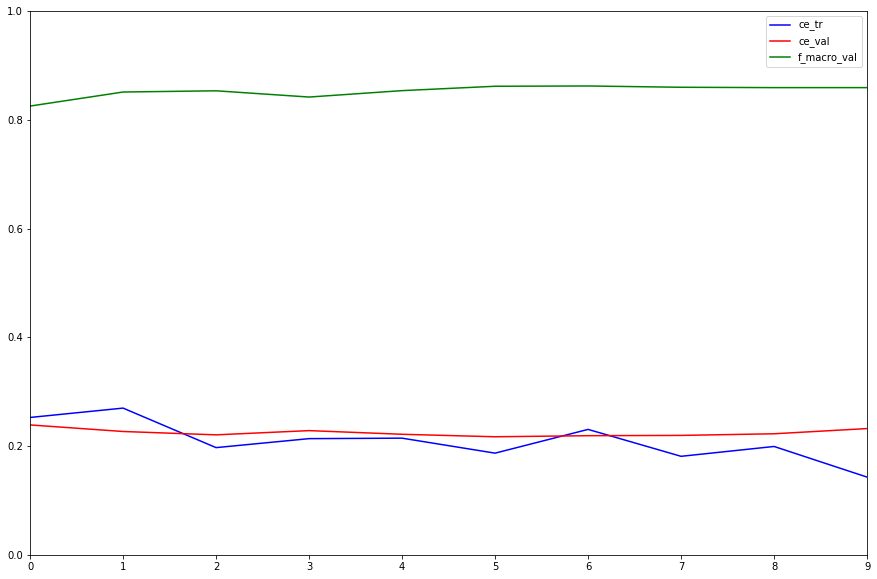

CPU times: user 2h 4min 20s, sys: 10min 11s, total: 2h 14min 32s
Wall time: 1h 4min 28s


In [21]:
%%time
from sklearn.model_selection import StratifiedKFold, KFold

FOLDS = 10

DROPOUT = 0.5  # Probability of keeping a neuron
BATCH_SIZE = 256
EPOCHS = 10


skf = KFold(FOLDS, shuffle=True, random_state=42)

results = []

for train_index, test_index in skf.split(X, y):
    X_tr, X_val = X[train_index], X[test_index]
    y_tr, y_val = y[train_index], y[test_index]

    train_batch_generator = batch_generator(X_tr, y_tr, BATCH_SIZE)

    loss_tr_l = []
    loss_val_l = []
    ce_tr_l = []  # Cross-entropy
    ce_val_l = []
    acc_tr_l = []  # Accuracy
    acc_val_l = []
    f_macro_tr_l = []
    f_macro_val_l = []
    f_fair_tr_l = []
    f_fair_val_l = []

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(init_embeddings, feed_dict={embeddings_ph: embeddings})
        print "Start learning..."
        for epoch in range(EPOCHS):
            for i in range(int(X_tr.shape[0] / BATCH_SIZE)):
                x_batch, y_batch = train_batch_generator.next()
                seq_len_tr = np.array([list(x).index(eos_id) + 1 for x in x_batch])
                sess.run(optimizer, feed_dict={batch_ph: x_batch, target_ph: y_batch,
                                               seq_len_ph: seq_len_tr, keep_prob_ph: DROPOUT})

            y_pred_tr, ce_tr, loss_tr, acc_tr = sess.run([y_hat, cross_entropy, loss, accuracy],
                                                  feed_dict={batch_ph: x_batch, target_ph: y_batch, 
                                                             seq_len_ph: seq_len_tr, keep_prob_ph: 1.0})
            
            y_pred_val, ce_val, loss_val, acc_val = [], 0, 0, 0
            num_val_batches = X_val.shape[0] / BATCH_SIZE
            for i in range(num_val_batches):
                x_batch_val, y_batch_val = X_val[i * BATCH_SIZE : (i + 1) * BATCH_SIZE],\
                                           y_val[i * BATCH_SIZE : (i + 1) * BATCH_SIZE]
                seq_len_val = np.array([list(x).index(eos_id) + 1 for x in x_batch_val])
                y_pred_val_, ce_val_, loss_val_, acc_val_ = sess.run([y_hat, cross_entropy, loss, accuracy],
                                                             feed_dict={batch_ph: x_batch_val, target_ph: y_batch_val,
                                                                        seq_len_ph: seq_len_val, keep_prob_ph: 1.0})
                y_pred_val += list(y_pred_val_)
                ce_val += ce_val_
                loss_val += loss_val_
                acc_val += acc_val_
            
            y_pred_val = np.array(y_pred_val)
            ce_val /= num_val_batches
            loss_val /= num_val_batches
            acc_val /= num_val_batches

            y_pred_tr = np.array([cls2probs(cls) for cls in np.argmax(y_pred_tr, 1) - 1])
            y_pred_val = np.array([cls2probs(cls) for cls in np.argmax(y_pred_val, 1) - 1])
            f_macro_tr, f_micro_tr = f_macro(y_batch, y_pred_tr), f_micro(y_batch, y_pred_tr)
            f_macro_val, f_micro_val = f_macro(y_val[:num_val_batches * BATCH_SIZE], y_pred_val),\
                                       f_micro(y_val[:num_val_batches * BATCH_SIZE], y_pred_val)
        

            loss_tr_l.append(loss_tr)
            loss_val_l.append(loss_val)
            ce_tr_l.append(ce_tr)
            ce_val_l.append(ce_val)
            acc_tr_l.append(acc_tr)
            acc_val_l.append(acc_val)
            f_macro_tr_l.append(f_macro_tr)
            f_macro_val_l.append(f_macro_val)

            clear_output(wait=True)
            print "epoch: {}".format(epoch)
            print "\t Train loss: {:.3f}\t ce: {:.3f}\t acc: {:.3f}\t f_macro: {:.3f}".format(
                loss_tr, ce_tr, acc_tr, f_macro_tr)
            print "\t Valid loss: {:.3f}\t ce: {:.3f}\t acc: {:.3f}\t f_macro: {:.3f}".format(
                loss_val, ce_val, acc_val, f_macro_val)

            plt.figure(figsize=(15,10))
            plt.plot(ce_tr_l, color='blue', label='ce_tr')
            plt.plot(ce_val_l, color='red', label='ce_val')        
            plt.plot(f_macro_val_l, color='green', label='f_macro_val')
            plt.xlim(0, EPOCHS - 1)
            plt.ylim(0, 1)
            plt.legend()
            plt.show()
            
    results.append([max(acc_val_l), max(f_macro_val_l)])

In [22]:
# hid 300, ep 10, Adam 1e-3, max_val_f
results

[[0.90660511363636365, 0.8609150287519296],
 [0.90749289772727271, 0.86527864310817271],
 [0.8984375, 0.84810574448603093],
 [0.89808238636363635, 0.84657496806072641],
 [0.89861505681818177, 0.85076954424847528],
 [0.90589488636363635, 0.85873962444018026],
 [0.90358664772727271, 0.86244872924388749],
 [0.90838068181818177, 0.86613039815504766],
 [0.91139914772727271, 0.87110309333624658],
 [0.90465198863636365, 0.8624367435301542]]

---

---

### Bi-RNN with Attention mechanism

Attention mechanism formulas and notation
$$
\upsilon_{t}=\tanh{(W_{\omega}\left[\overrightarrow{h_{t}},\overleftarrow{h_{t}}\right]+b_{\omega})}\\
\alpha_{t}=\frac{\exp{(\upsilon_{t}^{T}u_{\omega})}}{\sum_{j=1}^{T}\exp{(\upsilon_{j}^{T}u_{\omega})}}\\
\upsilon=\sum_{t=1}^{T}\alpha_{t}h_{t}	
$$

In [31]:
EMBED_DIM = 300
SEQ_LENGTH = length_max
HIDDEN_SIZE = 300
ATTENTION_SIZE = 20
NUM_CLASSES = 2

tf.reset_default_graph()

batch_ph   = tf.placeholder(tf.int32, [None, SEQ_LENGTH])
target_ph  = tf.placeholder(tf.float32, [None, NUM_CLASSES])
seq_len_ph = tf.placeholder(tf.int32, [None])
keep_prob_ph = tf.placeholder(tf.float32)

embeddings_ph = tf.placeholder(tf.float32, [len(vocabulary), EMBED_DIM])
embeddings_var = tf.Variable(tf.constant(0., shape=[len(vocabulary), EMBED_DIM]), trainable=False)
init_embeddings = embeddings_var.assign(embeddings_ph)

batch_embedded = tf.nn.embedding_lookup(embeddings_var, batch_ph)

# Bi-RNN layers
outputs,_ = bi_rnn(GRUCell(HIDDEN_SIZE), GRUCell(HIDDEN_SIZE),
                   inputs=batch_embedded,sequence_length=seq_len_ph, dtype=tf.float32, scope="bi_rnn1")  
outputs = tf.concat(outputs, 2)
# outputs,_ = bi_rnn(GRUCell(HIDDEN_SIZE), GRUCell(HIDDEN_SIZE),
#                          inputs=outputs,sequence_length=seq_len_ph, dtype=tf.float32, scope="bi_rnn2")
# outputs = tf.concat(outputs, 2)

# Attention mechanism
W_omega = tf.Variable(tf.random_normal([2 * HIDDEN_SIZE, ATTENTION_SIZE], stddev=0.1))
b_omega = tf.Variable(tf.random_normal([ATTENTION_SIZE], stddev=0.1))
u_omega = tf.Variable(tf.random_normal([ATTENTION_SIZE], stddev=0.1))

v = tf.nn.relu(tf.matmul(tf.reshape(outputs, [-1, 2 * HIDDEN_SIZE]), W_omega) + tf.reshape(b_omega, [1, -1]))
vu = tf.matmul(v, tf.reshape(u_omega, [-1, 1]))
exps = tf.reshape(tf.exp(vu), [-1, SEQ_LENGTH])
alphas = exps / tf.reshape(tf.reduce_sum(exps, 1), [-1, 1])

# Output of Bi-RNN reduced with attention vector
output = tf.reduce_sum(outputs * tf.reshape(alphas, [-1, SEQ_LENGTH, 1]), 1)

# Dropout
drop = tf.nn.dropout(output, keep_prob_ph)

# Fully connected layer
W = tf.Variable(tf.truncated_normal([HIDDEN_SIZE * 2, NUM_CLASSES], stddev=0.1), name="W")
b = tf.Variable(tf.constant(0., shape=[NUM_CLASSES]), name="b")
y_hat = tf.nn.xw_plus_b(drop, W, b, name="scores")

In [32]:
# Adam parameters
LEARNING_RATE = 1e-3
EPSILON = 1e-5
BETA1 = 0.9
BETA2 = 0.9
# L2 regularization coefficient
BETA = 0

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=target_ph, logits=y_hat), name="cross_entropy")
l2_loss = tf.nn.l2_loss(W, name="l2_loss")
loss = cross_entropy + l2_loss * BETA
optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE, beta1=BETA1, beta2=BETA2,
                                   epsilon=EPSILON).minimize(loss)
# optimizer = tf.train.MomentumOptimizer(learning_rate=LEARNING_RATE, momentum=0.1).minimize(loss)

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(target_ph, 1), tf.argmax(y_hat, 1)), tf.float32))

fold: 9
epoch: 9
	 Train loss: 0.171	 ce: 0.171	 acc: 0.930	 f_macro: 0.902
	 Valid loss: 0.238	 ce: 0.238	 acc: 0.901	 f_macro: 0.857


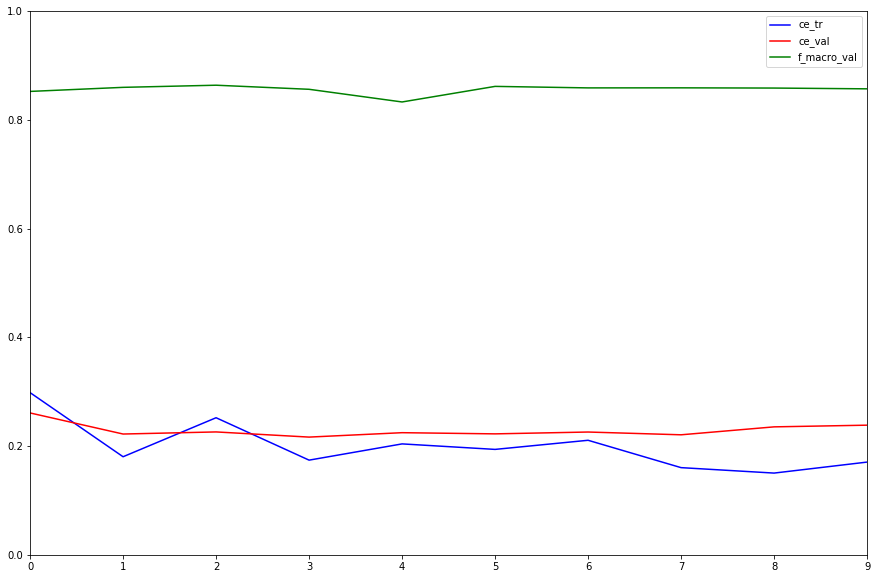

In [33]:
from sklearn.model_selection import StratifiedKFold, KFold

FOLDS = 10

DROPOUT = 0.5  # Probability of keeping a neuron
BATCH_SIZE = 256
EPOCHS = 10

skf = KFold(FOLDS, shuffle=True, random_state=42)

results_att = []

for fold_i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_tr, X_val = X[train_index], X[test_index]
    y_tr, y_val = y[train_index], y[test_index]

    train_batch_generator = batch_generator(X_tr, y_tr, BATCH_SIZE)

    loss_tr_l = []
    loss_val_l = []
    ce_tr_l = []  # Cross-entropy
    ce_val_l = []
    acc_tr_l = []  # Accuracy
    acc_val_l = []
    f_macro_tr_l = []
    f_macro_val_l = []
    f_fair_tr_l = []
    f_fair_val_l = []
    min_ce = 0.32

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(init_embeddings, feed_dict={embeddings_ph: embeddings})
        print "Start learning..."
        for epoch in range(EPOCHS):
            for i in range(int(X_tr.shape[0] / BATCH_SIZE)):
                x_batch, y_batch = train_batch_generator.next()
                seq_len_tr = np.array([list(x).index(eos_id) + 1 for x in x_batch])
                sess.run(optimizer, feed_dict={batch_ph: x_batch, target_ph: y_batch,
                                               seq_len_ph: seq_len_tr, keep_prob_ph: DROPOUT})

            y_pred_tr, ce_tr, loss_tr, acc_tr = sess.run([y_hat, cross_entropy, loss, accuracy],
                                                  feed_dict={batch_ph: x_batch, target_ph: y_batch, 
                                                             seq_len_ph: seq_len_tr, keep_prob_ph: 1.0})
            
            y_pred_val, ce_val, loss_val, acc_val = [], 0, 0, 0
            num_val_batches = X_val.shape[0] / BATCH_SIZE
            for i in range(num_val_batches):
                x_batch_val, y_batch_val = X_val[i * BATCH_SIZE : (i + 1) * BATCH_SIZE],\
                                           y_val[i * BATCH_SIZE : (i + 1) * BATCH_SIZE]
                seq_len_val = np.array([list(x).index(eos_id) + 1 for x in x_batch_val])
                y_pred_val_, ce_val_, loss_val_, acc_val_ = sess.run([y_hat, cross_entropy, loss, accuracy],
                                                             feed_dict={batch_ph: x_batch_val, target_ph: y_batch_val,
                                                                        seq_len_ph: seq_len_val, keep_prob_ph: 1.0})
                y_pred_val += list(y_pred_val_)
                ce_val += ce_val_
                loss_val += loss_val_
                acc_val += acc_val_
            
            y_pred_val = np.array(y_pred_val)
            ce_val /= num_val_batches
            loss_val /= num_val_batches
            acc_val /= num_val_batches

            y_pred_tr = np.array([cls2probs(cls) for cls in np.argmax(y_pred_tr, 1) - 1])
            y_pred_val = np.array([cls2probs(cls) for cls in np.argmax(y_pred_val, 1) - 1])
            f_macro_tr, f_micro_tr = f_macro(y_batch, y_pred_tr), f_micro(y_batch, y_pred_tr)
            f_macro_val, f_micro_val = f_macro(y_val[:num_val_batches * BATCH_SIZE], y_pred_val),\
                                       f_micro(y_val[:num_val_batches * BATCH_SIZE], y_pred_val)
        

            loss_tr_l.append(loss_tr)
            loss_val_l.append(loss_val)
            ce_tr_l.append(ce_tr)
            ce_val_l.append(ce_val)
            acc_tr_l.append(acc_tr)
            acc_val_l.append(acc_val)
            f_macro_tr_l.append(f_macro_tr)
            f_macro_val_l.append(f_macro_val)

            clear_output(wait=True)
            print "fold: {}".format(fold_i)
            print "epoch: {}".format(epoch)
            print "\t Train loss: {:.3f}\t ce: {:.3f}\t acc: {:.3f}\t f_macro: {:.3f}".format(
                loss_tr, ce_tr, acc_tr, f_macro_tr)
            print "\t Valid loss: {:.3f}\t ce: {:.3f}\t acc: {:.3f}\t f_macro: {:.3f}".format(
                loss_val, ce_val, acc_val, f_macro_val)

            plt.figure(figsize=(15,10))
            plt.plot(ce_tr_l, color='blue', label='ce_tr')
            plt.plot(ce_val_l, color='red', label='ce_val')        
            plt.plot(f_macro_val_l, color='green', label='f_macro_val')
            plt.xlim(0, EPOCHS - 1)
            plt.ylim(0, 1)
            plt.legend()
            plt.show()
            
    results_att.append([max(acc_val_l), max(f_macro_val_l)])

In [34]:
# hid 300, att 20 relu, ep 10, Adam 1e-3, max_val_f
results_att

[[0.90873579545454541, 0.86610162749413266],
 [0.91086647727272729, 0.86953411924880086],
 [0.89488636363636365, 0.84473691894119796],
 [0.90056818181818177, 0.85117658751251701],
 [0.89932528409090906, 0.85202867544946137],
 [0.90518465909090906, 0.86305702427121167],
 [0.90802556818181823, 0.87076874227458811],
 [0.90607244318181823, 0.86319561263962763],
 [0.90873579545454541, 0.86436267965996139],
 [0.90340909090909094, 0.86385022069381356]]

---

---

---

# Testing

In [18]:
review_test = pd.read_csv('../data/kinopoisk_test.csv', sep=',', encoding='utf-8')
texts_test, labels_test = review_test.text.values, review_test.label.values

In [21]:
from collections import Counter

print Counter(labels)
print Counter(labels_test)
print labels.shape[0]
print labels_test.shape[0]

Counter({1: 21695, -1: 3754, 0: 3627})
Counter({1: 5349, -1: 989, 0: 932})
29076
7270


In [263]:
%%time
pool = multiprocessing.Pool()
X_test = pool.map(text2seq, texts_test)
cPickle.dump(X_test, open('../data/X_review_test.pkl', 'wb'))

CPU times: user 272 ms, sys: 728 ms, total: 1 s
Wall time: 39 s


In [254]:
X_test = cPickle.load(open('../data/X_review_test.pkl', 'rb'))

In [274]:
X_test = [x + [eos_id]*(length_max - len(x)) for x in X_test]
X_test = np.array(X_test)
y_test = np.array([cls2probs(cls) for cls in labels_test])

In [292]:
X_val.shape, y_val.shape, X_test.shape, y_test.shape

((537, 29), (537, 3), (3418, 29), (3418, 3))

In [352]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('model_birnn_momentum.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))
    
    seq_len_test = np.array([list(x).index(eos_id) + 1 for x in X_test])
    y_pred_test, ce_test, loss_test, acc_test = sess.run([y_hat, cross_entropy, loss, accuracy],
                                                     feed_dict={batch_ph: X_test, target_ph: y_test,
                                                                seq_len_ph: seq_len_test, keep_prob_ph: 1.0})
    seq_len_val = np.array([list(x).index(eos_id) + 1 for x in X_val])
    y_pred_val, ce_val, loss_val, acc_val = sess.run([y_hat, cross_entropy, loss, accuracy],
                                                         feed_dict={batch_ph: X_val, target_ph: y_val,
                                                                    seq_len_ph: seq_len_val, keep_prob_ph: 1.0})

In [353]:
y_pred_val = np.array([cls2probs(cls) for cls in np.argmax(y_pred_val, 1) - 1])
f_macro_val, f_micro_val = f_macro(y_val, y_pred_val), f_micro(y_val, y_pred_val)
print f_macro_val, f_micro_val

0.629508196721 0.794366197183


In [354]:
y_pred_test = np.array([cls2probs(cls) for cls in np.argmax(y_pred_test, 1) - 1])
f_macro_test, f_micro_test = f_macro(y_test, y_pred_test), f_micro(y_test, y_pred_test)
print f_macro_test, f_micro_test

0.434433507829 0.522274881517
